In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os,joblib
import re 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [8]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

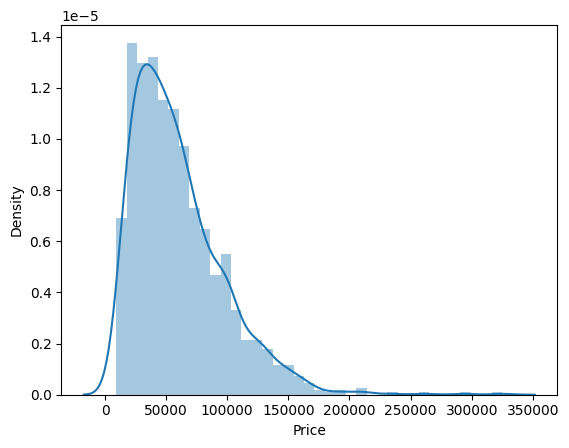

In [9]:
sns.distplot(df['Price'])
plt.show()

In [10]:
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

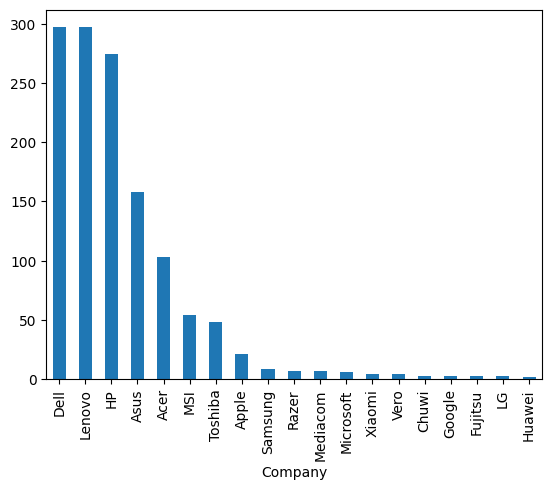

In [11]:
df['Company'].value_counts().plot(kind='bar')
plt.show()

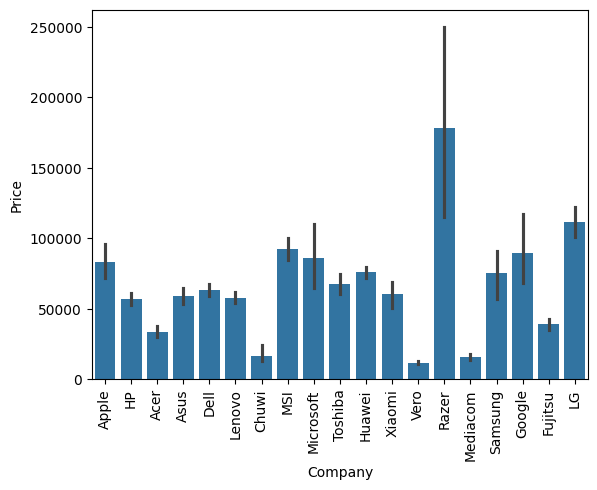

In [12]:
sns.barplot(x='Company',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

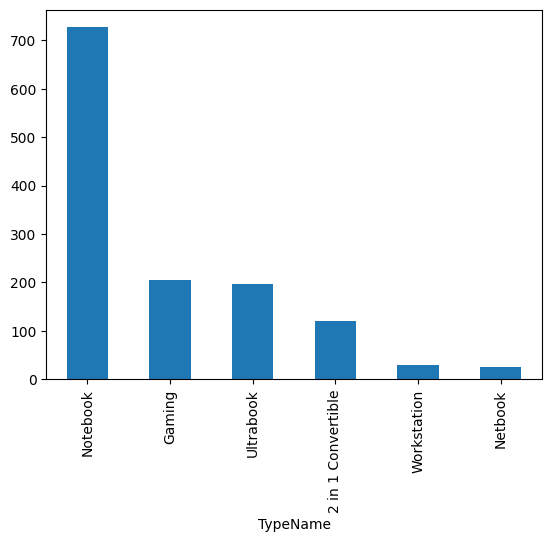

In [13]:
df['TypeName'].value_counts().plot(kind='bar')
plt.show()

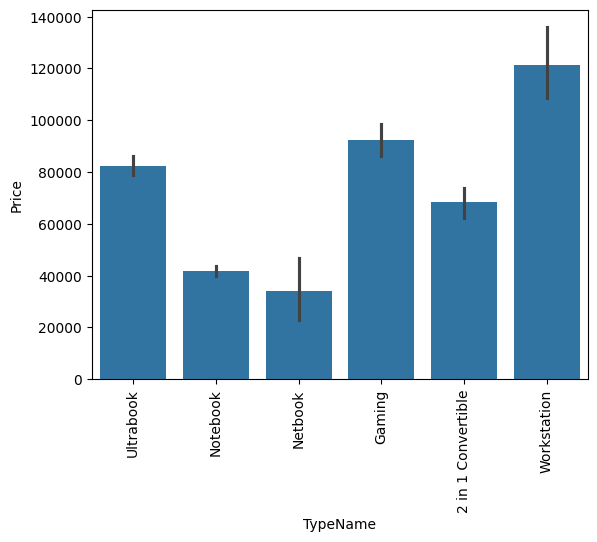

In [14]:
sns.barplot(x='TypeName',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

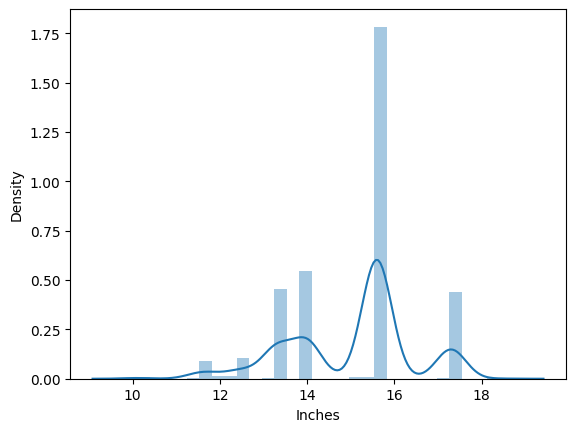

In [15]:
sns.distplot(df['Inches'])
plt.show()

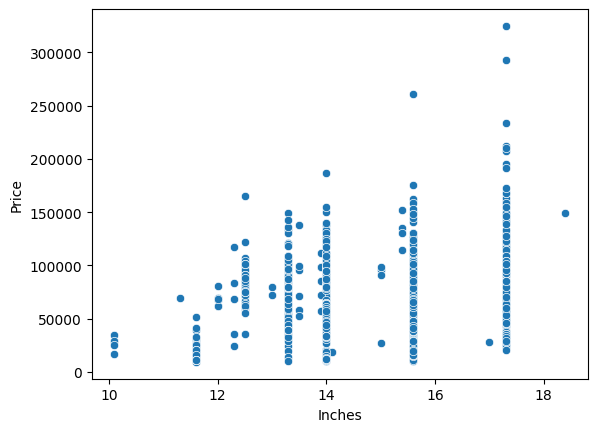

In [16]:
sns.scatterplot(x='Inches',y='Price',data=df)
plt.show()

In [17]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [18]:
df['TouchScreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [19]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [20]:
df['TouchScreen'].value_counts()

TouchScreen
0    1111
1     192
Name: count, dtype: int64

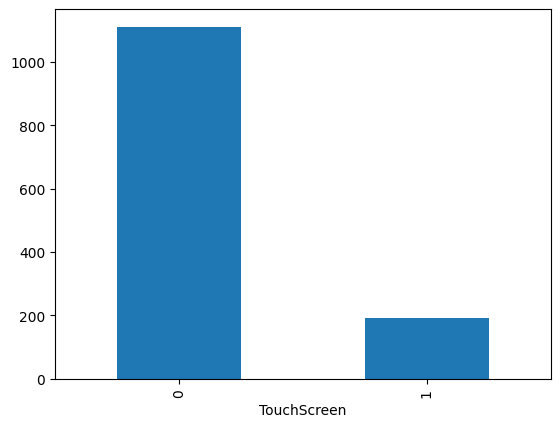

In [21]:
df['TouchScreen'].value_counts().plot(kind='bar')
plt.show()

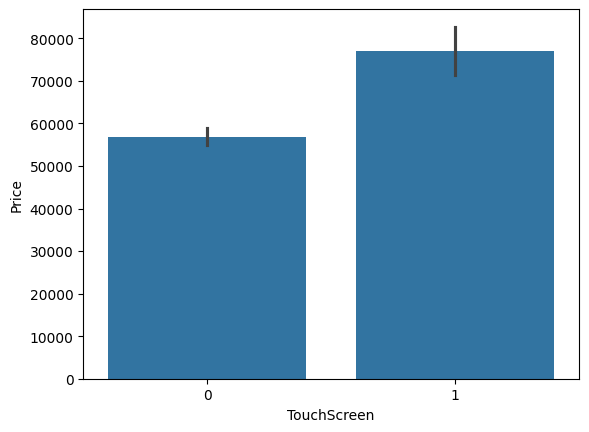

In [22]:
sns.barplot(x='TouchScreen',y='Price',data=df)
plt.show()

In [23]:
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

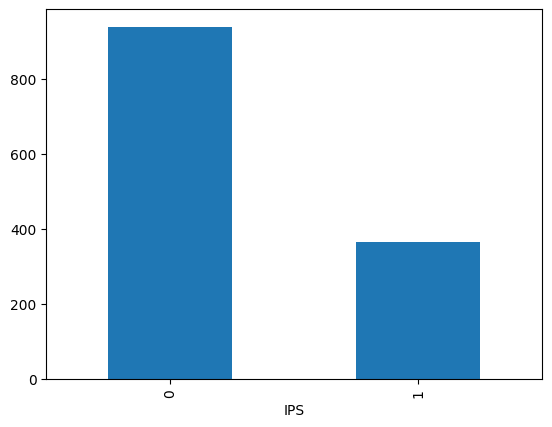

In [24]:
df['IPS'].value_counts().plot(kind='bar')
plt.show()

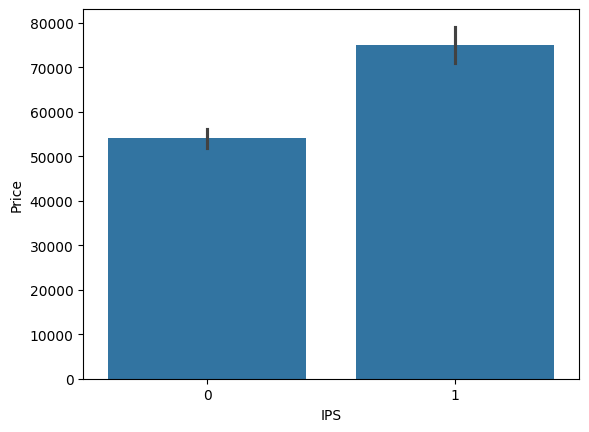

In [25]:
sns.barplot(x='IPS',y='Price',data=df)
plt.show()

In [26]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [27]:
new=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [28]:
df['X_res']=new[0]
df['Y_res']=new[1]

In [29]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [30]:
for i in range(len(df['X_res'])):
    X_res=df['X_res'][i]
    df['X_res'][i]=re.sub("[^0-9]","",X_res)

In [31]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [33]:
# X_res and Y_res in integer
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [35]:
# PPI=Pixels Per Inches
# PPI=root[((X_res*X_res)+(Y_res*Yres))]/Inches
df['ppi']=(((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches'])
df['ppi'].astype('float')

0       226.983005
1       127.677940
2       141.211998
3       220.534624
4       226.983005
           ...    
1298    157.350512
1299    276.053530
1300    111.935204
1301    100.454670
1302    100.454670
Name: ppi, Length: 1303, dtype: float64

In [36]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [37]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [38]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [39]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [40]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [41]:
df['Cpu Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))   #" ".join is used to convert it into string.
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [42]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [43]:
df['Cpu Brand']=df['Cpu Name'].apply(fetch_processor)

In [44]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu Name,Cpu Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu Brand'>

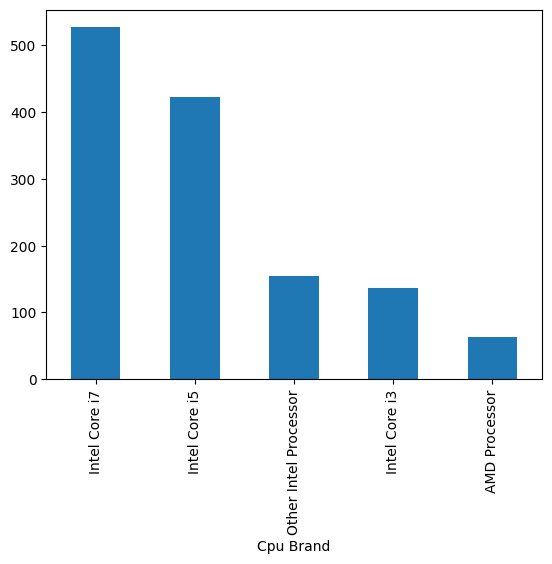

In [45]:
df['Cpu Brand'].value_counts().plot(kind='bar')

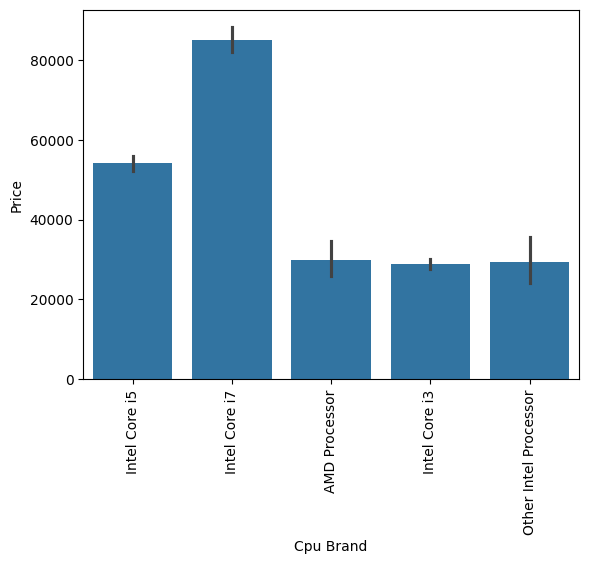

In [46]:
sns.barplot(x='Cpu Brand',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

In [47]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [48]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

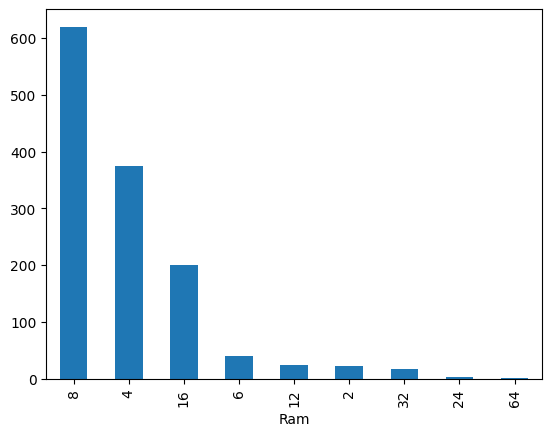

In [49]:
df['Ram'].value_counts().plot(kind='bar')

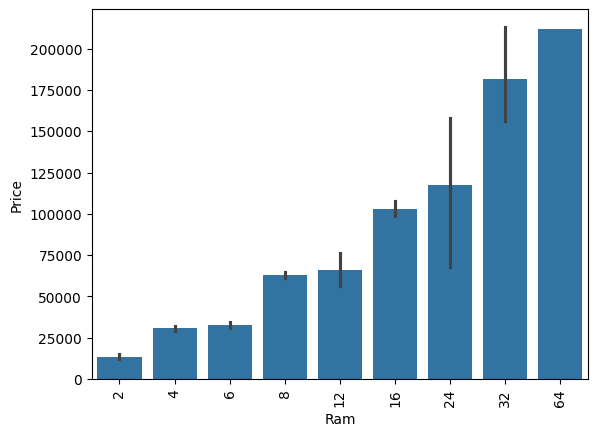

In [50]:
sns.barplot(x='Ram',y='Price',data=df)
plt.xticks(rotation='vertical')
plt.show()

In [51]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [52]:
import pandas as pd

# Assuming the DataFrame is already loaded and named as 'df'

# Function to extract storage sizes from the memory specification
def extract_storage_sizes(memory):
    ssd = 0
    hdd = 0
    hybrid = 0
    flash_storage = 0
    
    # Splitting the memory specification by '+' to handle multiple storage types
    components = memory.split('+')
    for component in components:
        component = component.strip()  # Remove leading/trailing spaces
        if 'SSD' in component:
            # Extracting SSD size
            ssd += int(''.join(filter(str.isdigit, component)))
        elif 'HDD' in component:
            # Extracting HDD size
            hdd += int(''.join(filter(str.isdigit, component)))
        elif 'Hybrid' in component:
            # Extracting Hybrid size
            hybrid += int(''.join(filter(str.isdigit, component)))
        elif 'Flash Storage' in component:
            # Extracting Flash Storage size
            flash_storage += int(''.join(filter(str.isdigit, component)))
    
    return pd.Series([ssd, hdd, hybrid, flash_storage])

# Apply the function and create new columns
df[['SSD', 'HDD', 'Hybrid', 'Flash_Storage']] = df['Memory'].apply(extract_storage_sizes)


In [53]:
df.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu Brand,SSD,HDD,Hybrid,Flash_Storage
938,Dell,Ultrabook,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,87325.9200,0,0,157.350512,Intel Core i5,256,0,0,0
1246,Dell,Notebook,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.60,46620.0000,0,0,111.935204,Intel Core i5,0,500,0,0
720,Lenovo,Ultrabook,8,512GB SSD,Intel HD Graphics 520,Windows 10,1.17,89864.1792,0,1,209.800683,Intel Core i7,512,0,0,0
78,Acer,Notebook,4,1TB HDD,Nvidia GeForce MX130,Windows 10,2.20,28238.4000,0,0,141.211998,Intel Core i3,0,1,0,0
959,Acer,2 in 1 Convertible,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25,20725.9200,1,1,135.094211,Other Intel Processor,0,0,0,32
426,Dell,Notebook,8,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.02,60867.0720,0,0,141.211998,Intel Core i7,256,2,0,0
1058,Dell,2 in 1 Convertible,12,256GB SSD,Intel HD Graphics 620,Windows 10,1.60,69210.7200,1,1,165.632118,Intel Core i7,256,0,0,0
755,Lenovo,2 in 1 Convertible,8,256GB SSD,Intel HD Graphics 540,Windows 10,1.30,63882.7200,1,1,276.053530,Intel Core i5,256,0,0,0
373,Lenovo,Notebook,4,128GB SSD,AMD Radeon R5,Windows 10,2.60,26053.9200,0,0,106.113062,AMD Processor,128,0,0,0
1264,Dell,Notebook,2,500GB HDD,Intel HD Graphics,Windows 10,2.20,20193.1200,0,0,100.454670,Other Intel Processor,0,500,0,0


In [54]:
df.drop(columns=['Memory'],inplace=True)

In [55]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu Brand,SSD,HDD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,0,0


In [56]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)     # Drop because price not very much depend on Hybrid or Flash_Storage.

In [57]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu Brand,SSD,HDD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0


In [58]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [59]:
df['Gpu Brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [60]:
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [61]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu Brand,SSD,HDD,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel


In [62]:
df=df[df['Gpu Brand']!='ARM']

In [63]:
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

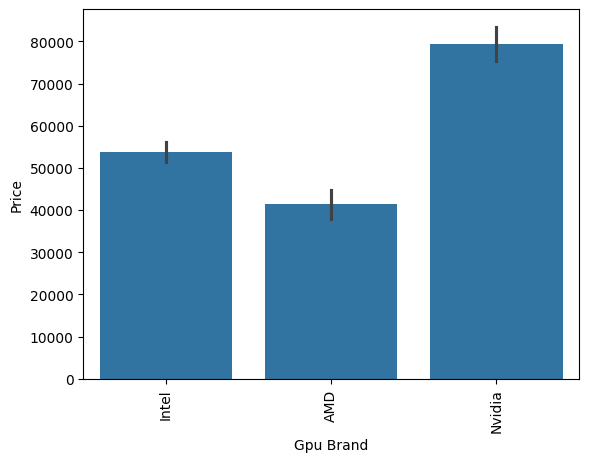

In [64]:
sns.barplot(x='Gpu Brand',y='Price',data=df)
plt.xticks(rotation='vertical')
plt.show()

In [65]:
df.drop(columns=['Gpu'],inplace=True)

In [66]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu Brand,SSD,HDD,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel


In [67]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

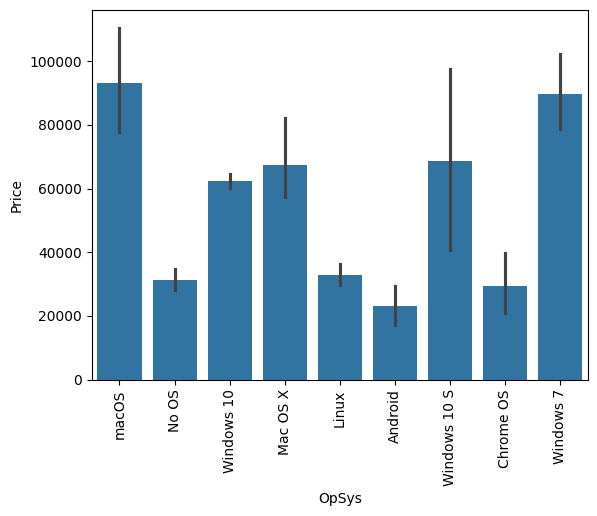

In [68]:
sns.barplot(x='OpSys',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

In [69]:
def cat_os(inp):
    if inp=='Windows 10' or inp=='Windows 7' or inp=='Windows 10 S':
        return 'Windows'
    elif inp=='macOS' or inp=='Mac OS X':
        return 'Mac'
    else:
        return 'No OS/Linux/Android/Chrome OS'

In [70]:
df['OS']=df['OpSys'].apply(cat_os)

In [71]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu Brand,SSD,HDD,Gpu Brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel,No OS/Linux/Android/Chrome OS
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel,Mac


In [72]:
df.drop(columns=['OpSys'],inplace=True)

In [73]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,Cpu Brand,SSD,HDD,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel,No OS/Linux/Android/Chrome OS
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel,Mac


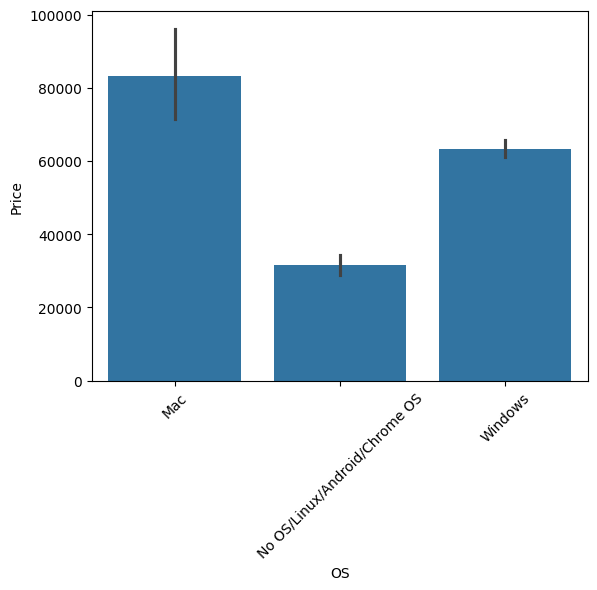

In [74]:
sns.barplot(x='OS',y='Price',data=df)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Weight', ylabel='Density'>

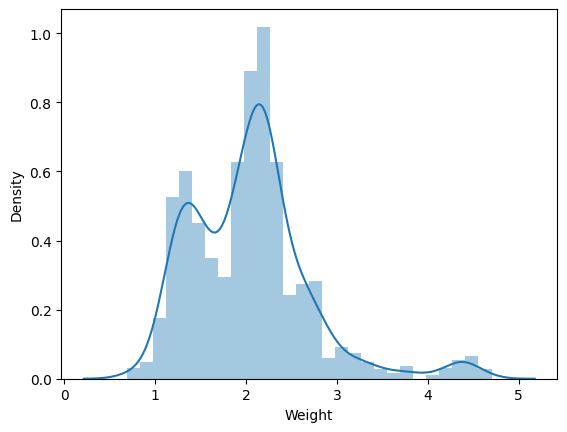

In [75]:
sns.distplot(df['Weight'])

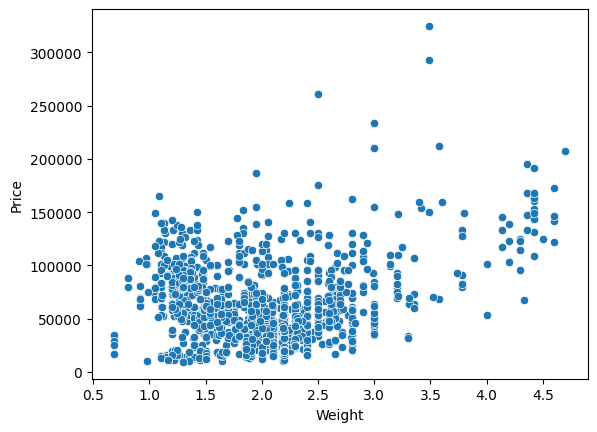

In [76]:
sns.scatterplot(x='Weight',y='Price',data=df)
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

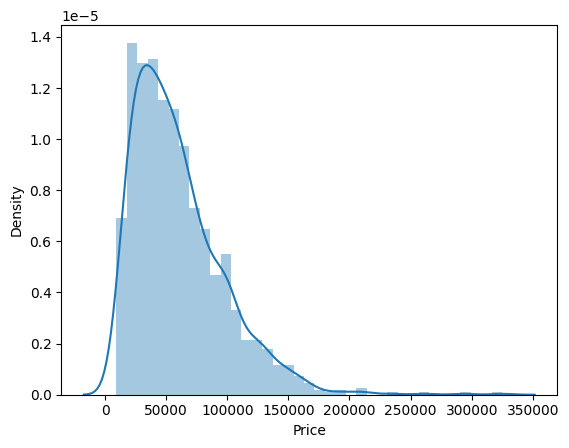

In [77]:
sns.distplot(df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

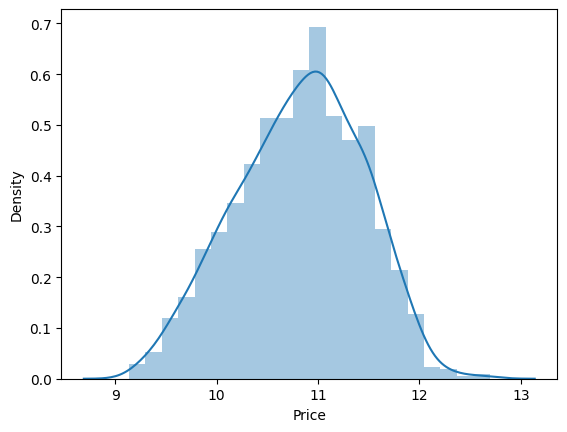

In [78]:
sns.distplot(np.log(df['Price']))

In [79]:
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [80]:
Company_brand=list(df['Company'].value_counts().head(8).index)
Company_brand

['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'MSI', 'Toshiba', 'Apple']

In [81]:
df2=df[df['Company'].isin(Company_brand)]
df2.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,Cpu Brand,SSD,HDD,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel,No OS/Linux/Android/Chrome OS
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel,Mac


In [82]:
df2['Company'].value_counts()

Company
Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Toshiba     48
Apple       21
Name: count, dtype: int64

In [83]:
dt={'Lenovo': 1,'Dell': 2,'HP': 3,
 'Asus': 4,
 'Acer': 5,
 'MSI': 6,
 'Toshiba': 7,
 'Apple': 8} 

In [84]:
df['Company']=df['Company'].map(dt)
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,Cpu Brand,SSD,HDD,Gpu Brand,OS
0,8.0,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,8.0,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,3.0,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel,No OS/Linux/Android/Chrome OS
3,8.0,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,8.0,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1.0,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,128,0,Intel,Windows
1299,1.0,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,512,0,Intel,Windows
1300,1.0,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,3.0,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,0,1,AMD,Windows


In [85]:
df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: count, dtype: int64

In [86]:
typename=list(df['TypeName'].value_counts().head(4).index)
typename

['Notebook', 'Gaming', 'Ultrabook', '2 in 1 Convertible']

In [87]:
df2=df[df['TypeName'].isin(typename)]
df2.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,Cpu Brand,SSD,HDD,Gpu Brand,OS
0,8.0,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,8.0,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,3.0,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel,No OS/Linux/Android/Chrome OS
3,8.0,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,8.0,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel,Mac


In [88]:
dt1={'Notebook':1,'Gaming':2,'Ultrabook':3,'2 in 1 Convertible':4}

In [89]:
df['TypeName']=df['TypeName'].map(dt1)
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,Cpu Brand,SSD,HDD,Gpu Brand,OS
0,8.0,3.0,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,8.0,3.0,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,3.0,1.0,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel,No OS/Linux/Android/Chrome OS
3,8.0,3.0,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,8.0,3.0,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1.0,4.0,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,128,0,Intel,Windows
1299,1.0,4.0,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,512,0,Intel,Windows
1300,1.0,1.0,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,3.0,1.0,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,0,1,AMD,Windows


In [90]:
df['Cpu Brand'].value_counts()

Cpu Brand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             62
Name: count, dtype: int64

In [91]:
dt2={'Intel Core i7':1,'Intel Core i5':2,'Other Intel Processor':4,'Intel Core i3':3,'AMD Processor ':5}

In [92]:
df['Cpu Brand']=df['Cpu Brand'].map(dt2)
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,Cpu Brand,SSD,HDD,Gpu Brand,OS
0,8.0,3.0,8,1.37,71378.6832,0,1,226.983005,2.0,128,0,Intel,Mac
1,8.0,3.0,8,1.34,47895.5232,0,0,127.677940,2.0,0,0,Intel,Mac
2,3.0,1.0,8,1.86,30636.0000,0,0,141.211998,2.0,256,0,Intel,No OS/Linux/Android/Chrome OS
3,8.0,3.0,16,1.83,135195.3360,0,1,220.534624,1.0,512,0,AMD,Mac
4,8.0,3.0,8,1.37,96095.8080,0,1,226.983005,2.0,256,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1.0,4.0,4,1.80,33992.6400,1,1,157.350512,1.0,128,0,Intel,Windows
1299,1.0,4.0,16,1.30,79866.7200,1,1,276.053530,1.0,512,0,Intel,Windows
1300,1.0,1.0,2,1.50,12201.1200,0,0,111.935204,4.0,0,0,Intel,Windows
1301,3.0,1.0,6,2.19,40705.9200,0,0,100.454670,1.0,0,1,AMD,Windows


In [93]:
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [94]:
dt3={'Intel':1,'Nvidia':2,'AMD':3}

In [95]:
df['Gpu Brand']=df['Gpu Brand'].map(dt3)
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,Cpu Brand,SSD,HDD,Gpu Brand,OS
0,8.0,3.0,8,1.37,71378.6832,0,1,226.983005,2.0,128,0,1,Mac
1,8.0,3.0,8,1.34,47895.5232,0,0,127.677940,2.0,0,0,1,Mac
2,3.0,1.0,8,1.86,30636.0000,0,0,141.211998,2.0,256,0,1,No OS/Linux/Android/Chrome OS
3,8.0,3.0,16,1.83,135195.3360,0,1,220.534624,1.0,512,0,3,Mac
4,8.0,3.0,8,1.37,96095.8080,0,1,226.983005,2.0,256,0,1,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1.0,4.0,4,1.80,33992.6400,1,1,157.350512,1.0,128,0,1,Windows
1299,1.0,4.0,16,1.30,79866.7200,1,1,276.053530,1.0,512,0,1,Windows
1300,1.0,1.0,2,1.50,12201.1200,0,0,111.935204,4.0,0,0,1,Windows
1301,3.0,1.0,6,2.19,40705.9200,0,0,100.454670,1.0,0,1,3,Windows


In [96]:
df['OS'].value_counts()

OS
Windows                          1125
No OS/Linux/Android/Chrome OS     156
Mac                                21
Name: count, dtype: int64

In [97]:
dt4={'Windows':1,'Mac':2,'No OS/Linux/Android/Chrome OS':3}

In [98]:
df['OS']=df['OS'].map(dt4)
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,Cpu Brand,SSD,HDD,Gpu Brand,OS
0,8.0,3.0,8,1.37,71378.6832,0,1,226.983005,2.0,128,0,1,2
1,8.0,3.0,8,1.34,47895.5232,0,0,127.677940,2.0,0,0,1,2
2,3.0,1.0,8,1.86,30636.0000,0,0,141.211998,2.0,256,0,1,3
3,8.0,3.0,16,1.83,135195.3360,0,1,220.534624,1.0,512,0,3,2
4,8.0,3.0,8,1.37,96095.8080,0,1,226.983005,2.0,256,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1.0,4.0,4,1.80,33992.6400,1,1,157.350512,1.0,128,0,1,1
1299,1.0,4.0,16,1.30,79866.7200,1,1,276.053530,1.0,512,0,1,1
1300,1.0,1.0,2,1.50,12201.1200,0,0,111.935204,4.0,0,0,1,1
1301,3.0,1.0,6,2.19,40705.9200,0,0,100.454670,1.0,0,1,3,1


In [99]:
x=df.drop(columns=['Price'])
y=df['Price']

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [102]:
x_train.head()

,Company,TypeName,Ram,Weight,TouchScreen,IPS,ppi,Cpu Brand,SSD,HDD,Gpu Brand,OS
125,3.0,1.0,4,1.86,0,0,100.454670,4.0,0,500,1,3
789,2.0,2.0,8,2.62,0,0,141.211998,2.0,256,0,2,1
312,6.0,2.0,16,2.80,0,1,141.211998,1.0,256,1,2,1
453,1.0,1.0,8,1.65,0,0,157.350512,2.0,256,0,1,1
633,1.0,1.0,4,2.20,0,0,141.211998,3.0,0,1,2,1


In [103]:
y_train.head()

125     13799.52
789     52480.80
312    111834.72
453     71661.60
633     30849.12
Name: Price, dtype: float64

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC,SVR
from sklearn.impute import SimpleImputer

In [105]:
df.isnull().sum()

Company        50
TypeName       54
Ram             0
Weight          0
Price           0
TouchScreen     0
IPS             0
ppi             0
Cpu Brand      62
SSD             0
HDD             0
Gpu Brand       0
OS              0
dtype: int64

In [106]:
df= df.dropna()

In [107]:
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
IPS            0
ppi            0
Cpu Brand      0
SSD            0
HDD            0
Gpu Brand      0
OS             0
dtype: int64

In [111]:
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)

x_test = imputer.transform(x_test)

lnr = LinearRegression()
dtr = DecisionTreeRegressor()
rtr = RandomForestRegressor(n_estimators=101, min_samples_split=15, min_samples_leaf=5)

lnr.fit(x_train, y_train)
dtr.fit(x_train, y_train)
rtr.fit(x_train, y_train)

print("LinearRegression training score:", lnr.score(x_train, y_train) * 100)
print("LinearRegression testing score:", lnr.score(x_test, y_test) * 100)
print()
print("DecisionTreeRegressor training score:", dtr.score(x_train, y_train) * 100)
print("DecisionTreeRegressor testing score:", dtr.score(x_test, y_test) * 100)
print()
print("RandomForestRegressor training score:", rtr.score(x_train, y_train) * 100)
print("RandomForestRegressor testing score:", rtr.score(x_test, y_test) * 100)


LinearRegression training score: 69.11613280383766
LinearRegression testing score: 65.58626323714358

DecisionTreeRegressor training score: 99.45029242041907
DecisionTreeRegressor testing score: 56.77530954225257

RandomForestRegressor training score: 84.25201305025108
RandomForestRegressor testing score: 77.19979572476203


In [109]:
os.makedirs('models',exist_ok=True)
joblib.dump(rtr,'./models/randomforestregression.lb')

['./models/randomforestregression.lb']

<Axes: xlabel='HDD'>

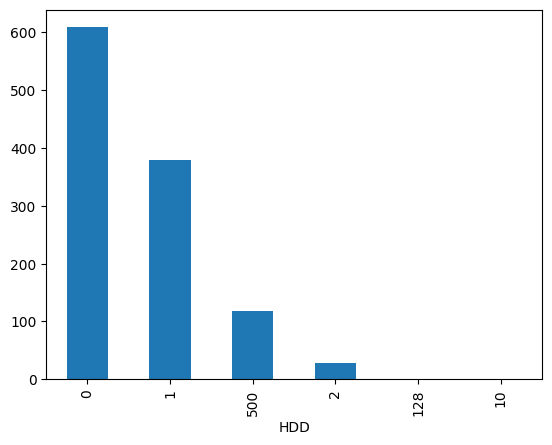

In [110]:
df['HDD'].value_counts().plot(kind='bar')